<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4Part7_P291.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!git clone https://github.com/hansjang/Py_Radar.git

import shutil
shutil.move('Py_Radar/data', '/content/data')

# 폴더와 그 안의 모든 파일을 삭제
# !rm -rf /content/Py_Radar
# !rm -rf /content/data

Cloning into 'Py_Radar'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 236 (delta 31), reused 0 (delta 0), pack-reused 166 (from 1)
Receiving objects: 100% (236/236), 7.64 MiB | 22.04 MiB/s, done.
Resolving deltas: 100% (117/117), done.


'/content/data'

## 1.One Sample t-test



In [3]:
import numpy as np
import pandas as pd
cats = pd.read_csv('/content/data/cats.csv')
display(cats.head())
display(cats.info())

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


None

##  Shapiro test : 정규성 검정

In [4]:
import scipy.stats as stats
from scipy.stats import shapiro
mu = 2.6
shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518791269479144, pvalue=6.730857622701013e-05)

pvalue가 유의수준 0.05보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다. 즉, cats데이터의 Bwt 변수는 정규분포를 따르지 않는다. 데이터가 정규분포를 따르지 않으므로 wilcoxon 테스트로 t-test를 진행한다. 만약, 정규분포를 따른다면 stats.ttest_1samp(cats.Bwt, popmean=mu)를 사용하면 된다.

In [5]:
stats.wilcoxon(cats.Bwt - mu, alternative = 'two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

Wilcoxon test 결과, pvaluesms 유의수준 0.05보다 작으므로 '고양이의 몸무게가 2.6kg이다'라는 귀무가설을 기각할 수 있다. 즉, 유의수준 0.05하에 고양이의 평균 몸무게는 2.6kg이라 할 수 없다.

In [9]:
stats.ttest_1samp(cats.Bwt, popmean=mu)

TtestResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613, df=143)

In [6]:
display(cats['Bwt'].mean())

2.7236111111111114

Text(0, 0.5, 'Count')

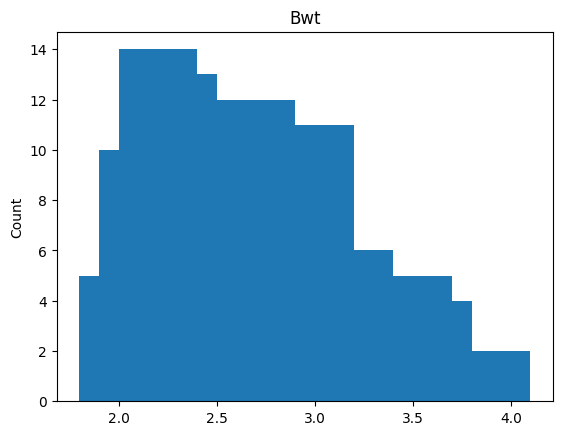

In [8]:
import matplotlib.pyplot as plt
# cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort = False)
cats_Bwt_cnt = pd.Series(cats['Bwt'].values).value_counts(sort=False)
width = 0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values, width)
plt.title('Bwt')
plt.ylabel('Count')

그래프로 시각화했을 때에도 해당 데이터는 정규성을 띄지 않음을 알 수 있으며, wilcoxon test 결과 p-value는 유의수준 0.05보다 작으므로 '고양이의 몸무게가 2.6kg이다'라는 귀무가설을 기각할 수 있다. 즉, 유의수준 0.05하에 고양이의 평균 몸무게는 2.6kg이라 할 수 없다.

## 2. Paired Sample t-test

In [10]:
# 데이터 불러오기
import numpy as np
import pandas as pd
data = {
    'before' : [7, 3, 4, 5, 2, 1, 6, 6, 5, 4],
    'after' : [8, 4, 5, 6, 2, 3, 6, 8, 6, 5]
}
data = pd.DataFrame(data)
display(data)

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [11]:
# 대응표본 t-test
stats.ttest_rel(data['after'], data['before'], alternative='greater')

TtestResult(statistic=4.743416490252569, pvalue=0.0005269356285082764, df=9)

검정결과 pvalue값이 유의수준 0.05보다 작으므로 귀무가설을 기각한다

In [12]:
data.mean()

,0
before,4.3
after,5.3


pvalue값이 유의수준보다 작으므로 '수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 늘었다'고 할 수 있다.

## 3. Independent Sample t-test

In [14]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro

cats = pd.read_csv('/content/data/cats.csv')
# display(cats.head())
# display(cats.info())
female = cats.loc[cats.Sex == 'F', 'Bwt']
male = cats.loc[cats.Sex == 'M', 'Bwt']
# 등분산성 검정(levene test)
stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [16]:
# 정규성 검정
shapiro_female = shapiro(female)
shapiro_male = shapiro(male)

print(shapiro_female)
print(shapiro_male)

# 그냥 정규성을 만족한다는 가정으로 하자!!

ShapiroResult(statistic=0.8909610476638475, pvalue=0.0003754219909760795)
ShapiroResult(statistic=0.9788323948987693, pvalue=0.11896203410780715)


성별에 따른 몸무게가 등분산성을 만족하지 않으므로, equal_var = False로 독립 t-test를 진행한다.

In [7]:
stats.ttest_ind(female, male, equal_var = False)

TtestResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15, df=136.83788299625363)

검정결과 pvalue는 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉 수컷과 암컷 고양이의 몸무게는 차이가 있다.

In [8]:
print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


수컷 고양이의 몸무게가 암컷 고양이 보다 더 많다.

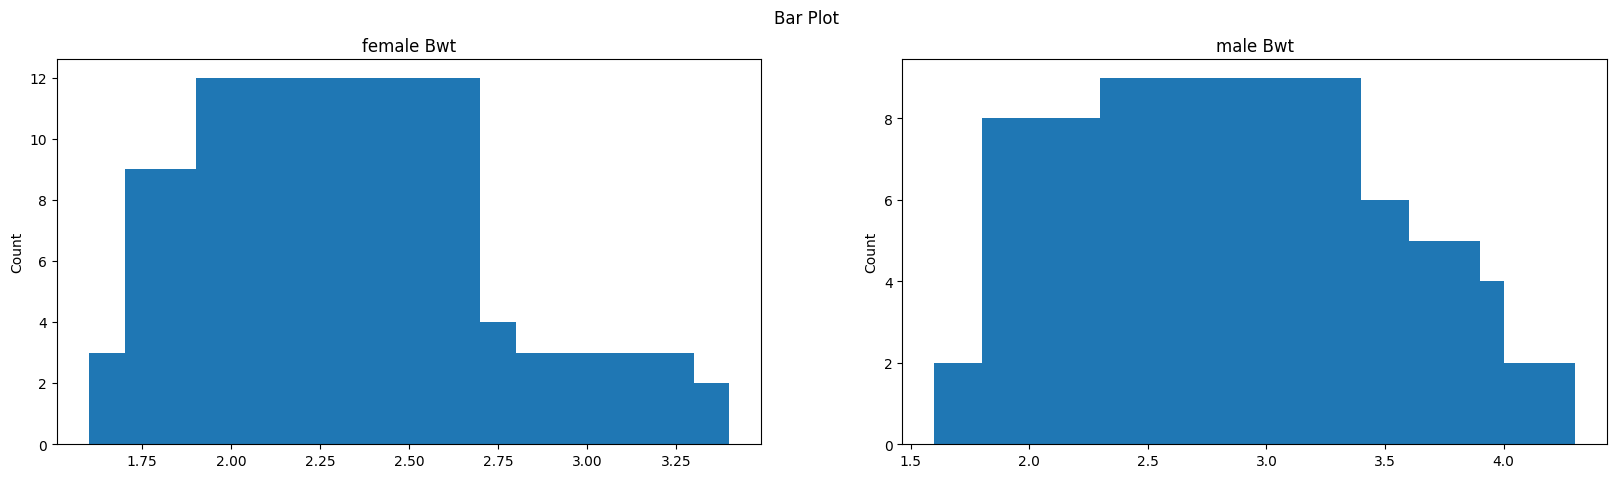

In [12]:
# 그래프 시각화
import matplotlib.pyplot as plt
female_Bwt_cnt = pd.Series(female.values).value_counts(sort = False)
male_Bwt_cnt = pd.Series(male.values).value_counts(sort = False)
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Bar Plot')
width = 0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male Bwt')
axs[1].set_ylabel('Count')
plt.show()

# 분산분석(ANOVA) : 일원배치 분산분석(One-way ANOVA)

In [22]:
import numpy as np
import pandas as pd
import scipy.stats as stats
iris = pd.read_csv('/content/data/iris.csv')
display(iris.head())
display(iris.info())

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [24]:
print(iris['target'].unique())
print(iris['target'].value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [28]:
target_list = iris['target'].unique()
print(target_list)
setosa = iris[iris['target'] == target_list[0]]['sepal width']
versicolor = iris[iris['target'] == target_list[1]]['sepal width']
virginica = iris[iris['target'] == target_list[2]]['sepal width']

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


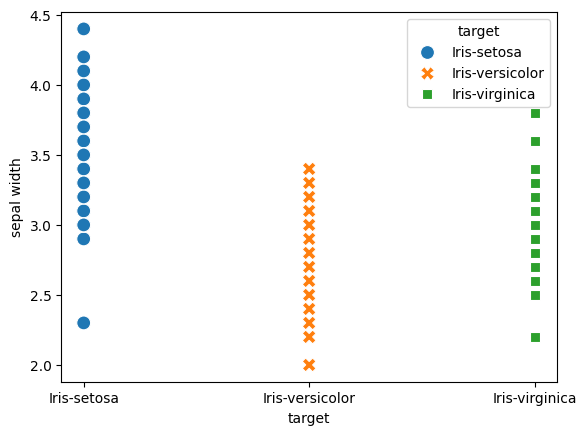

In [29]:
# target 시각화
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot by Groups
sns.scatterplot(x = 'target',
                y = 'sepal width',
                hue = 'target', # different colors by group
                style = 'target', # different shapes by group
                s = 100,  # marker size
                data = iris)
plt.show()

(1) H0 : 세 가지 종에 대해 Sepal Width의 평균은 모두 같다. <br>
(2) H1 : 적어도 하나의 종에 대한 Sepal Width의 평균값에는 차이가 있다.

In [30]:
# 정규성 검정
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.9686918964570316, pvalue=0.20465666067562632)
ShapiroResult(statistic=0.9741332819702798, pvalue=0.3379951061741378)
ShapiroResult(statistic=0.9673905311257006, pvalue=0.18089604109069918)


shapiro test 결과 3개의 표본 모두 pvalue > 0.05 이므로 정규성을 만족한다. <br>
따라서 등분산 검정을 시행한다. <br>
(만약 하나의 표본이라도 정규성을 만족하지 않는다면 stats.kruskal()을 고려해야 함)

In [31]:
# 등분산성 검정
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

pvalue > 0.05 이므로 귀무가설을 채택한다. 즉, 세 집단간 분산이 같다고 할 수 있다. (등분산성을 만족한다.)

In [32]:
# f-oneway 검정
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

pvalue < 0.05 이므로 귀무가설을 기각한다. <br>
즉, 세 가지 종의 꽃받침 폭의 평균은 차이가 있다.

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


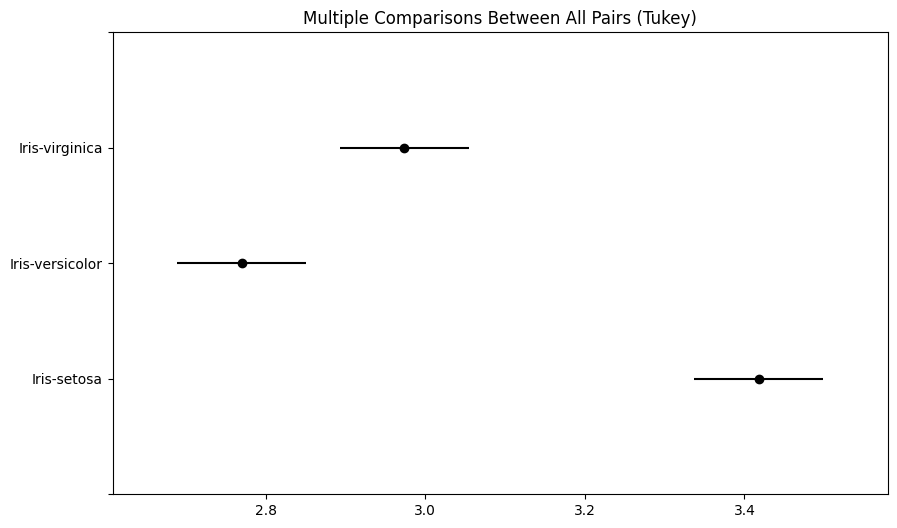

In [44]:
# 사후 검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data=iris['sepal width'], groups=iris['target'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


두 집단씩 짝을 지어 각각 다중비교를 수행했을 때 수정된 p-value(p-adj)가 모두 0.05보다 작으므로, 각각의 비교에 대한 귀무가설을 모두 기각한다. 즉, 모든 종들에 대해서 꽃받침 폭의 평균값은 통계적으로 유의한 차이가 있다는 것을 알 수 있다.

In [37]:
# 정규성을 만족하지 못했다면, kruskal 검정을 진행한다!
stats.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [41]:
# 등분산성을 만족하지 못했다면, welch_anova 분석을 진행한다!
# !pip install pingouin
import pingouin as pg
pg.welch_anova(data = iris, dv = 'sepal width', between = 'target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


# 분산분석(ANOVA) : 이원배치 분산분석(Two-way ANOVA)

In [5]:
import numpy as np
import pandas as pd
mtcars = pd.read_csv('/content/data/mtcars.csv')
# cyl, am, mpg 변수들로만 구성된 분석용 데이터세트 생성
mtcars = mtcars[['mpg', 'am', 'cyl']]
display(mtcars.head())
display(mtcars.info())
# 종속변수(연속형) : mpg (주행거리)
# 독립변수(범주형) : am(변속기종류), cyl(실린더개수)

,mpg,am,cyl
0,21.0,1,6
1,21.0,1,6
2,22.8,1,4
3,21.4,0,6
4,18.7,0,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


None

In [6]:
# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
display(aov_table)

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


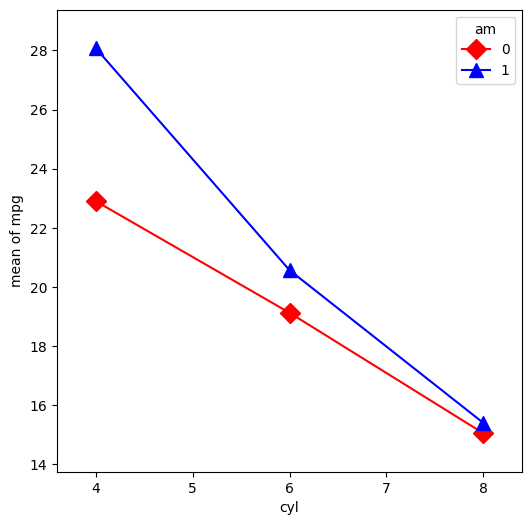

In [7]:
# 그래프 시각화
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
## 독립변수 cyl, am과 종속변수 mpg를 Series로 변경
cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(cyl, am, mpg,
                       colors=['r', 'b'],
                       markers=['D', '^'],
                       ms = 10, ax = ax)

# 교차분석(카이제곱 검정)

In [29]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/data/titanic.csv')
# display(df.head())
# display(df.info())
df_t = df[df['survived']==1]
table = df_t[['sex']].value_counts()
display(table)
# female : 233
# male : 109

,count
sex,
female,233
male,109


In [24]:
# 유의수준 0.05로 적합도 검정 수행
from scipy.stats import chisquare
chi = chisquare(table, f_exp=[171, 171])
print(chi)
# Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)

Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


In [34]:
# 독립성 검정
# 변수 선택
table = pd.crosstab(df['class'], df['survived'])
display(table)

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [35]:
# 카이제곱 검정을 통한 독립성 검정 수행
from scipy.stats import chi2_contingency
chi, p, dof, expect = chi2_contingency(table)

print('Statistic:\t', chi) # Statistic:	 102.88898875696056
print('p-value:\t', p)     # p-value:	 4.549251711298793e-23
print('dof:\t', dof)       # dof:	 2
print('expect:\t', chi)    # expect:	 102.88898875696056

Statistic:	 102.88898875696056
p-value:	 4.549251711298793e-23
dof:	 2
expect:	 102.88898875696056
